In [1]:
import tensorflow as tf

# ==========자료형==========

- 출처 : https://bcho.tistory.com/1150

### ㅇ 그래프, 세션
- 세션은 그래프를 인자로 받아서 실행을 해주는 일종의 러너(Runner)
- 예) d=a\*b+c는 그래프. 계산을 수행하는 것이 아니라 a\*b+c 그래프를 정의하는 것
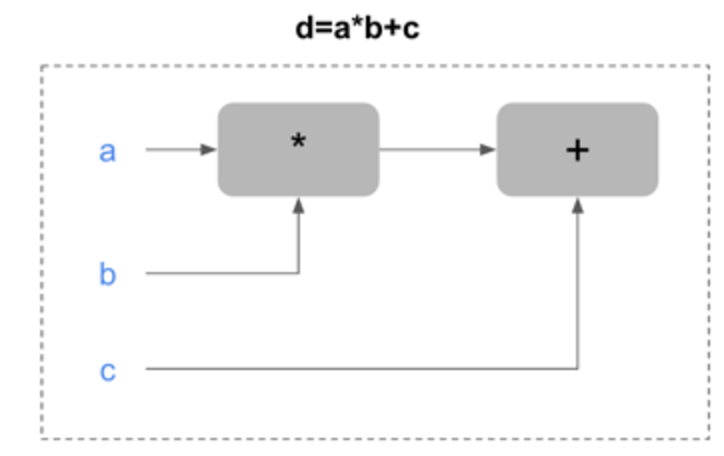

### ㅇ 상수형
- tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
  - value : 상수의 값
  - dtype : 상수의 데이터 타입 예) tf.float32
  - shape : 행렬의 차원 예) shape=[3,3]으로 정의해주면, 이 상수는 3x3 행렬 저장
  - name : 상수의 이름

In [2]:
a = tf.constant([5],dtype=tf.float32)
b = tf.constant([10],dtype=tf.float32)
c = tf.constant([2],dtype=tf.float32)

d = a*b+c

# 세션을 생성하고
sess = tf.Session()
        # 세션 sess에 그래프 d를 실행
result = sess.run(d)
print(result)


[52.]


### ㅇ 플레이스 홀더 (Placeholder)
- 학습용 데이터를 담는 그릇
- 여러 입력값을 그래프에서 넣는 경우 x는 학습을 위한 데이터
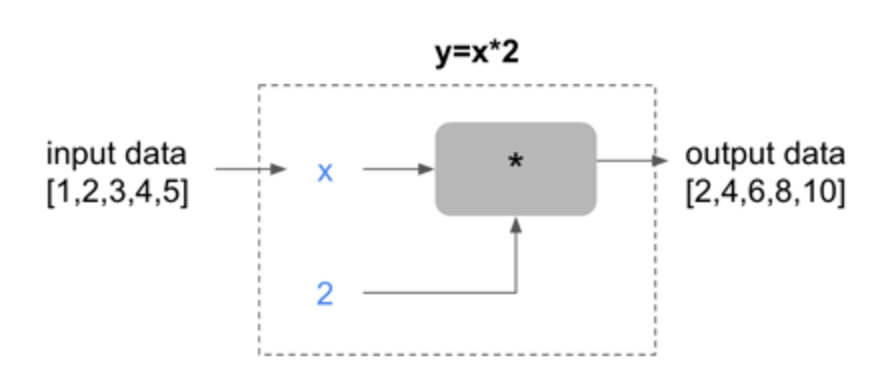
- tf.placeholder(dtype,shape,name) 
  - dtype : 저장되는 데이터 타입
  - shape : 행렬의 차원
  - name : 플레이스 홀더의 이름

### ㅇ 피딩 feeding
- 플레이스 홀더 x에 학습용 데이터를 넣는 것
- feed_dict = { 플레이스 홀더 : 인풋데이터 }
- 인풋데이터에서 **하나씩 하나씩 꺼내서** 플레이스 홀더에 집어 넣어
- 예) 플레이스홀더가 수 1개이면 인풋데이터는 수로 이루어진 리스트

In [3]:
input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)
y = x * 2

sess = tf.Session()

# 세션이 실행될 때, 하나씩 집어넣어 [1, 2, 3, 4, 5]
result = sess.run(y,feed_dict={x:input_data})

print(result)


[ 2.  4.  6.  8. 10.]


### ㅇ 변수형
- y=W\*x+b 라는 학습용 가설이 있을 때
  - x : 입력 데이터
  - W, b : 변수 : 학습을 통해서 구해야 하는 값
- Variable 형의 객체
- 예) var = tf.Variable([1,2,3,4,5], dtype=tf.float32)
- 변수형은 그래프를 실행하기 전에 초기화를 해줘야 그 값이 변수에 지정 됨
  - init = tf.global_variables_initializer()
  - sess.run(init)
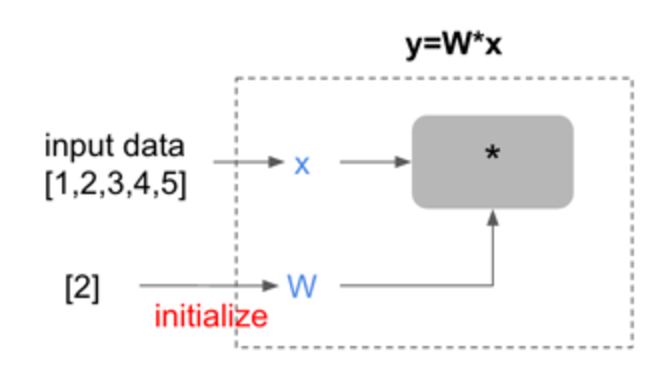

In [4]:
input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)
W = tf.Variable([2],dtype=tf.float32)
y = W*x

sess = tf.Session()

# 초기화
init = tf.global_variables_initializer()
sess.run(init)

result = sess.run(y,feed_dict={x:input_data})
print (result)


[ 2.  4.  6.  8. 10.]


In [5]:
# 실험1
# W에 [1, 2, 3, 4, 5]를 넣으면?
# 각 위치끼리의 곱으로 나옴
# feeding 할 때 var도 하나씩 하나씩 나오나봐

input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)
var = tf.Variable([1,2,3,4,5], dtype=tf.float32)
y = var*x

sess = tf.Session()

# 초기화
init = tf.global_variables_initializer()
sess.run(init)

result = sess.run(y,feed_dict={x:input_data})
print (result)

[ 1.  4.  9. 16. 25.]


# ======== 모델 저장, 로드, 예측 ========

- 출처 : https://wikidocs.net/104528

In [ ]:
# 모델 입출력 정보

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

    signature_def['serving_default']:
      The given SavedModel SignatureDef contains the following input(s):
        inputs['input'] tensor_info:
            dtype: DT_FLOAT
            shape: (-1, 1)
            name: input_2:0
      The given SavedModel SignatureDef contains the following output(s):
        outputs['output'] tensor_info:
            dtype: DT_FLOAT
            shape: (-1, 1)
            name: output_2:0
      Method name is: tensorflow/serving/predict
        
# 입출력 정보 확인
    # sess로 load한 모델을 model에 담았을 때
print(model.signature_def[tf.compat.v1.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY].inputs)
print(model.signature_def[tf.compat.v1.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY].outputs)
# 이 결과에서 이름 찾기

# 이름으로 텐서 찾기
input_tensor = sess.graph.get_tensor_by_name("인풋 이름")
output_tensor = sess.graph.get_tensor_by_name("아웃풋 이름")

# 입력 텐서, 출력 텐서의 데이터 유형, 형상 확인
print("입력 텐서의 데이터 유형 : ", input_tensor.dtype)
print("출력 텐서의 데이터 유형 : ", output_tensor.dtype)
print("입력 텐서의 쉐입 : ", input_tensor.shape)
print("출력 텐서의 쉐입 : ", output_tensor.shape)

# 모델로 예측
output = sess.run(output_tensor, feed_dict={input_tensor: input_data})